In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",15)
%matplotlib inline

In [2]:
class dataset:
    col_names = ["duration","protocol_type","service","flag","src_bytes",
        "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
        "logged_in","num_compromised","root_shell","su_attempted","num_root",
        "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
        "is_host_login","is_guest_login","count","srv_count","serror_rate",
        "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
        "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
        "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
        "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
        "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "difficulty_level"]

    kdd_train = pd.read_csv("dataset/KDDTrain+_20Percent.txt",names = col_names,)
    kdd_test = pd.read_csv("dataset/KDDTest-21.txt",names = col_names,)

    kdd_diff_level_train = kdd_train["difficulty_level"].copy()
    kdd_diff_level_test = kdd_test["difficulty_level"].copy()
    
    kdd_train = kdd_train.drop("difficulty_level", axis = 1)
    kdd_test = kdd_test.drop("difficulty_level", axis = 1)
    
    kdd_train.to_csv("dataset/KDDTrain+_20Percent.csv")
    kdd_test.to_csv("dataset/KDDTest-21.csv")

In [3]:
category_variables = ["protocol_type","service","flag"]
for cv in category_variables:
    dataset.kdd_train[cv] = dataset.kdd_train[cv].astype("category")
    dataset.kdd_test[cv] = dataset.kdd_test[cv].astype("category", 
                                                       categories = dataset.kdd_train[cv].cat.categories)
    print("Length of Categories for {} are {}".format(cv , len(dataset.kdd_train[cv].cat.categories)))
    print("Categories for {} are {} \n".format(cv ,dataset.kdd_train[cv].cat.categories))

Length of Categories for protocol_type are 3
Categories for protocol_type are Index(['icmp', 'tcp', 'udp'], dtype='object') 

Length of Categories for service are 66
Categories for service are Index(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf',
       'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i',
       'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames',
       'http', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin',
       'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i',
       'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc',
       'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp',
       'uucp_path', 'vmnet', 'whois'],
      dtype='object') 

Length of Categories for flag are 11
Categories for flag are Index(['OTH'

c:\users\anusha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [4]:
dataset.kdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25185,1,tcp,smtp,SF,2896,333,0,0,0,0,...,11,0.92,0.17,0.08,0.00,0.00,0.00,0.00,0.00,normal
25186,0,tcp,http,S1,339,14600,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,normal


In [5]:
dataset.kdd_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,guess_passwd
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap
5,0,tcp,http,SF,54540,8314,0,0,0,2,...,229,0.90,0.01,0.00,0.00,0.00,0.00,0.01,0.00,back
6,0,tcp,imap4,REJ,0,0,0,0,0,0,...,9,0.04,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11843,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.00,0.90,0.00,0.00,0.15,0.00,0.85,1.00,satan
11844,5,tcp,pop_3,SF,28,93,0,0,0,0,...,25,1.00,0.00,0.04,0.08,0.00,0.00,0.00,0.00,guess_passwd


In [6]:
dataset.kdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.kdd_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,11850.000000,1.185000e+04,1.185000e+04,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,...,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000
mean,415.439831,1.945644e+04,1.228105e+03,0.000591,0.016034,0.001350,0.190211,0.041181,0.253080,0.227679,...,213.945401,117.541603,0.539597,0.148986,0.206493,0.024465,0.104181,0.106697,0.263952,0.252209
std,1919.441623,6.519865e+05,2.389603e+04,0.024299,0.196379,0.050299,1.222392,0.205401,0.434795,10.025774,...,82.203728,106.563438,0.423370,0.288758,0.379193,0.114234,0.265086,0.278549,0.377337,0.403039
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000
75%,1.000000,1.600000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000
max,57715.000000,6.282565e+07,1.288652e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("Column - Label")
print("Unique values: \n{}".format(dataset.kdd_train.label))
print("\nStatistical properties: \n{}".format(dataset.kdd_train.label.describe()))

Column - Label
Unique values: 
0             normal
1             normal
2            neptune
3             normal
4             normal
5            neptune
6            neptune
            ...     
25185         normal
25186         normal
25187        neptune
25188    warezclient
25189        neptune
25190        neptune
25191        neptune
Name: label, Length: 25192, dtype: object

Statistical properties: 
count      25192
unique        22
top       normal
freq       13449
Name: label, dtype: object


In [9]:
attack_types = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

is_attack = {
    "DoS":"Attack",
    "R2L":"Attack",
    "U2R":"Attack",
    "Probe":"Attack",
    "normal":"Normal"
}

In [10]:
dataset.kdd_train["type"] = dataset.kdd_train.label.map(lambda x: attack_types[x])
dataset.kdd_train["is"] = dataset.kdd_train.type.map(lambda x: is_attack[x])

dataset.kdd_test["type"] = dataset.kdd_test.label.map(lambda x: attack_types[x])
dataset.kdd_test["is"] = dataset.kdd_test.type.map(lambda x: is_attack[x])

In [11]:
kdd_attack_type_group = dataset.kdd_train.groupby("type")
kdd_is_attack_group = dataset.kdd_train.groupby("is")

In [12]:
kdd_attack_type_group.type.count()

type
DoS        9234
Probe      2289
R2L         209
U2R          11
normal    13449
Name: type, dtype: int64

In [13]:
kdd_is_attack_group["is"].count()

is
Attack    11743
Normal    13449
Name: is, dtype: int64

In [14]:
df = dataset.kdd_train.set_index("is")
df.loc["Attack"].label.unique()

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy'], dtype=object)

In [15]:
df.loc["Normal"].label.unique()

array(['normal'], dtype=object)

is
Attack    [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
Normal    [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
dtype: object

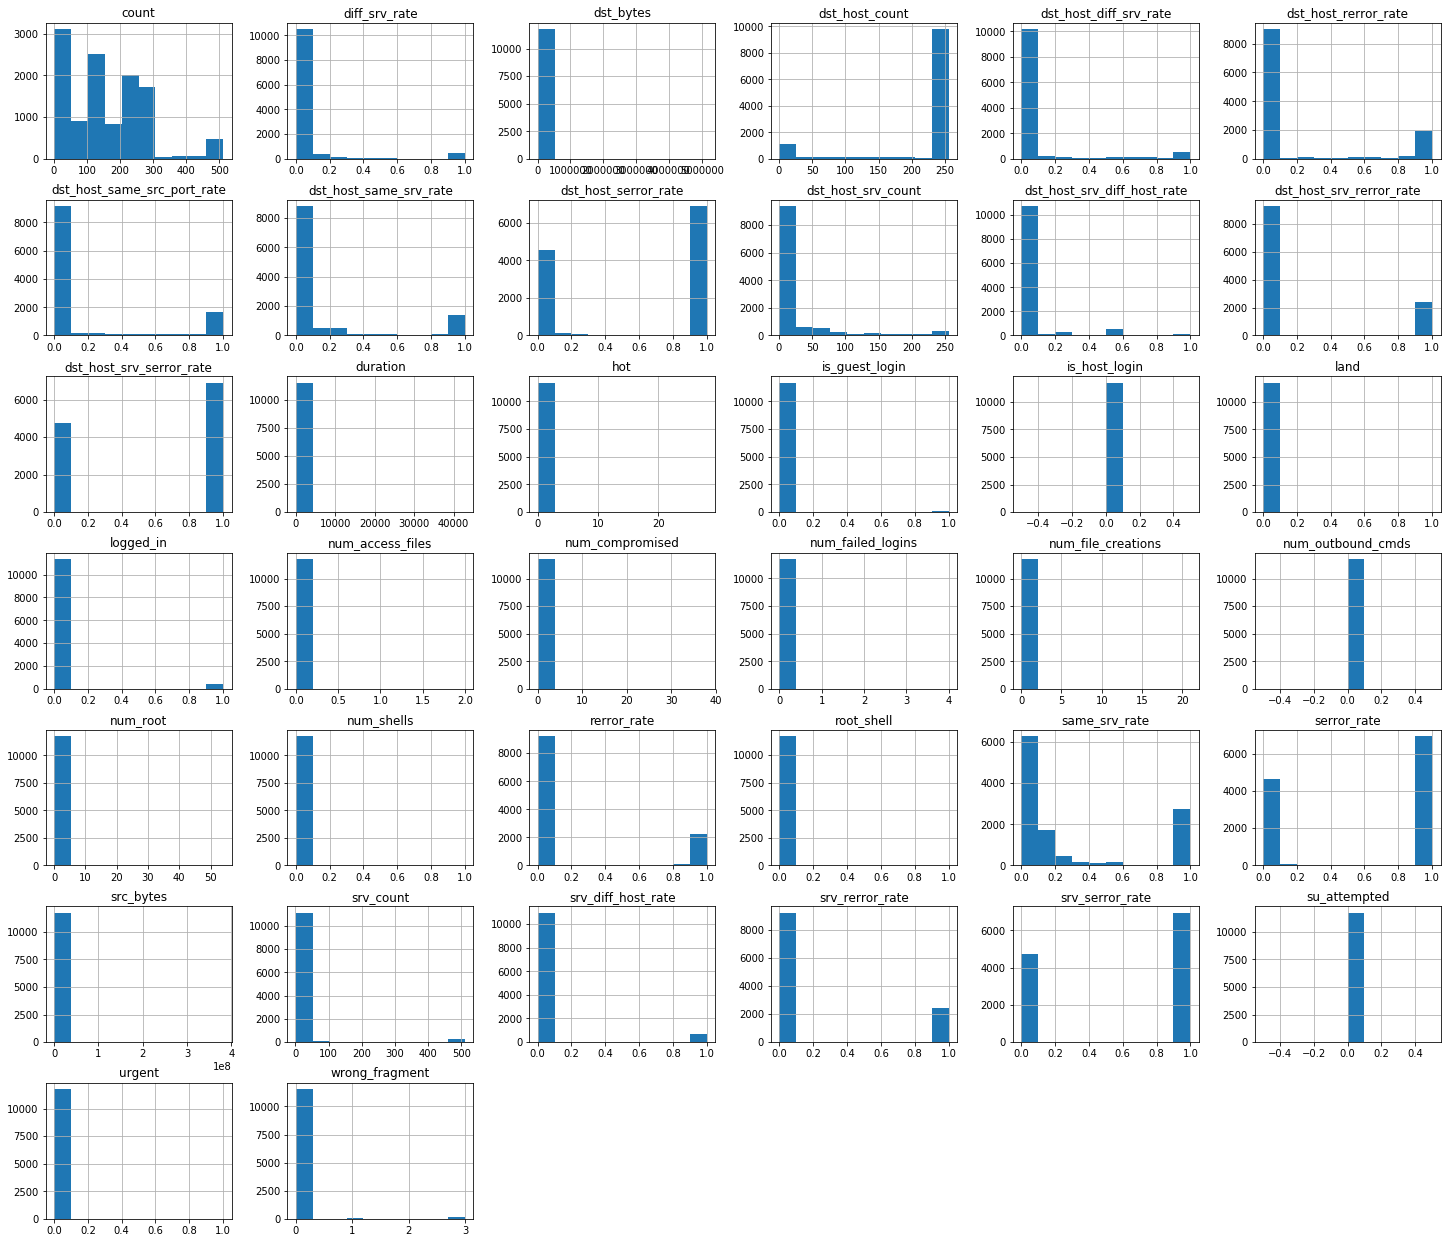

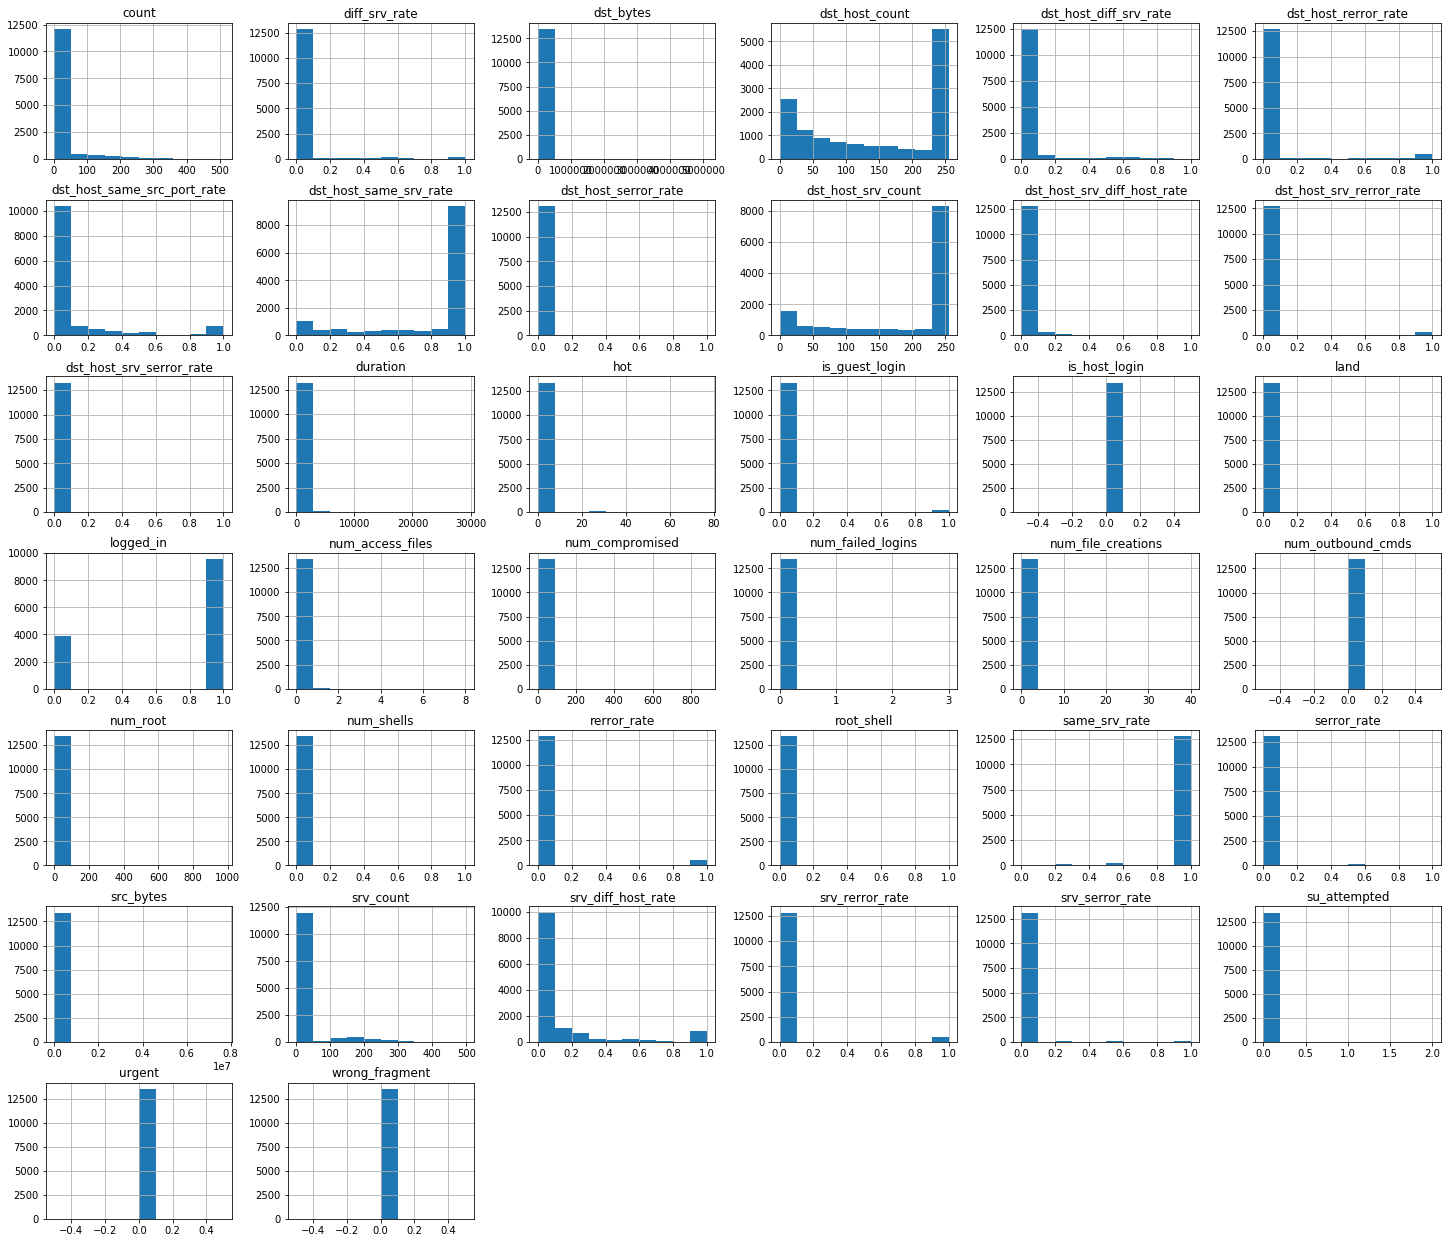

In [16]:
kdd_is_attack_group.hist(figsize=[25,22])


type
DoS       [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
Probe     [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
R2L       [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
U2R       [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
normal    [[AxesSubplot(0.125,0.794205;0.103333x0.085795...
dtype: object

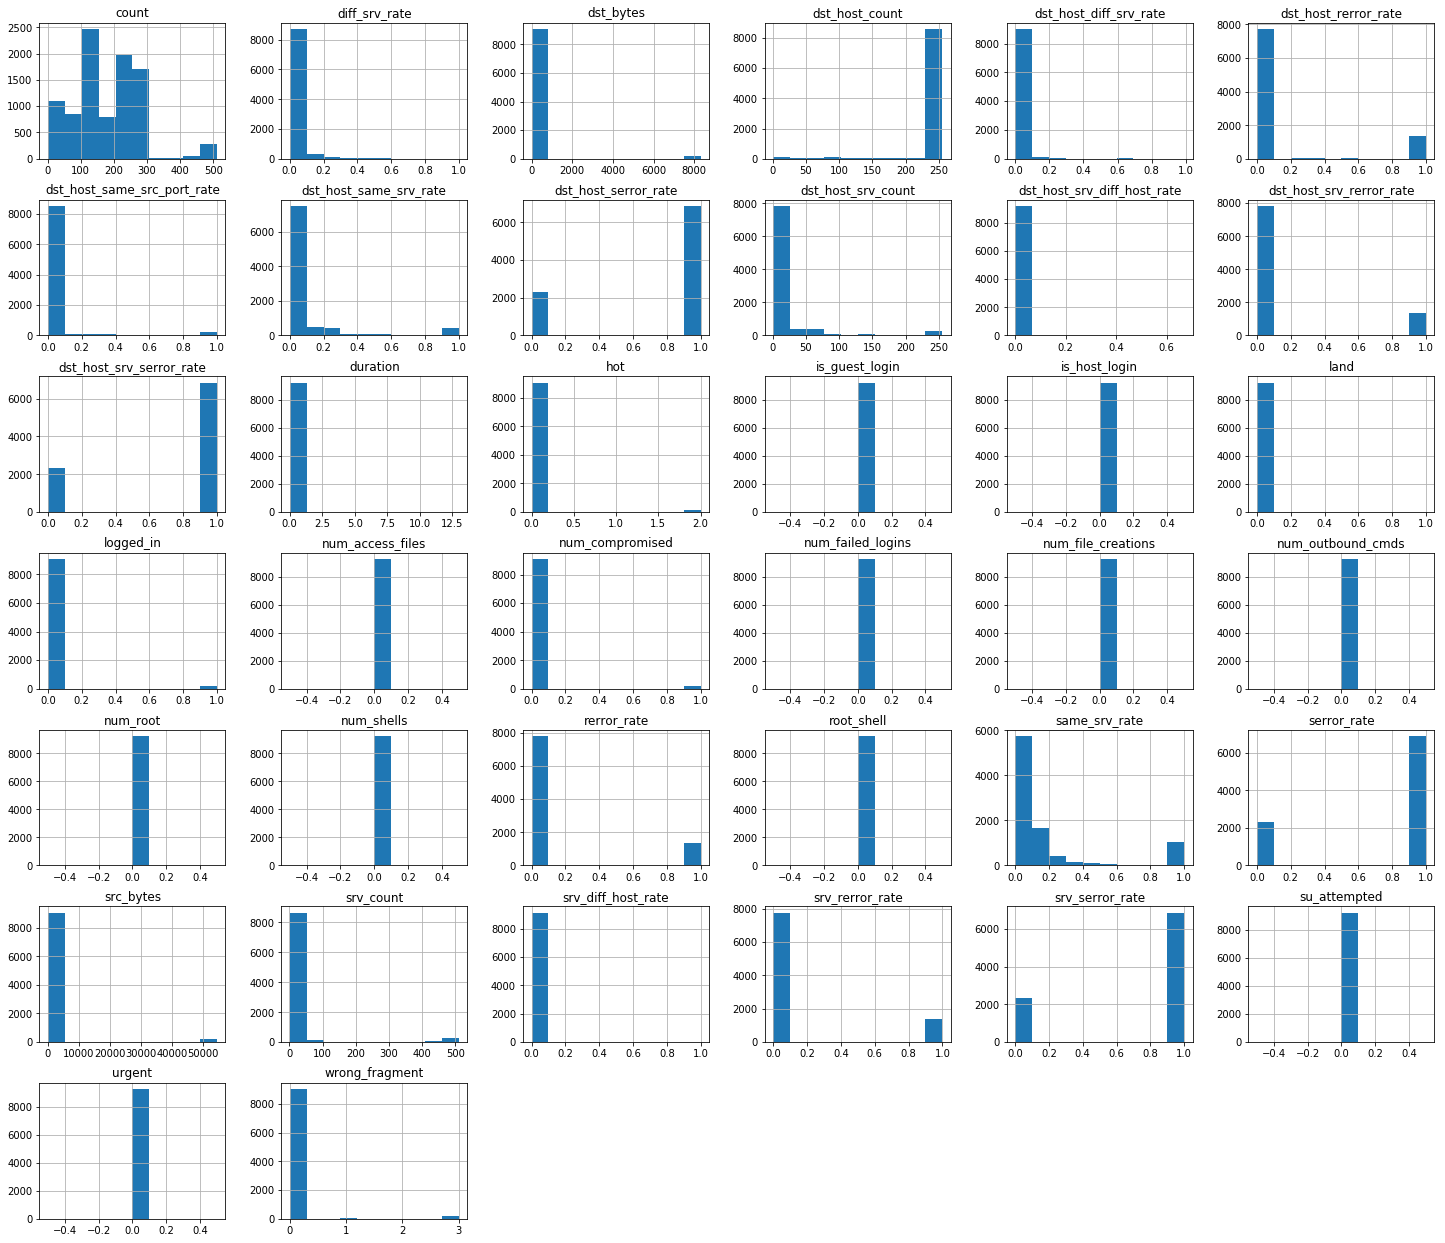

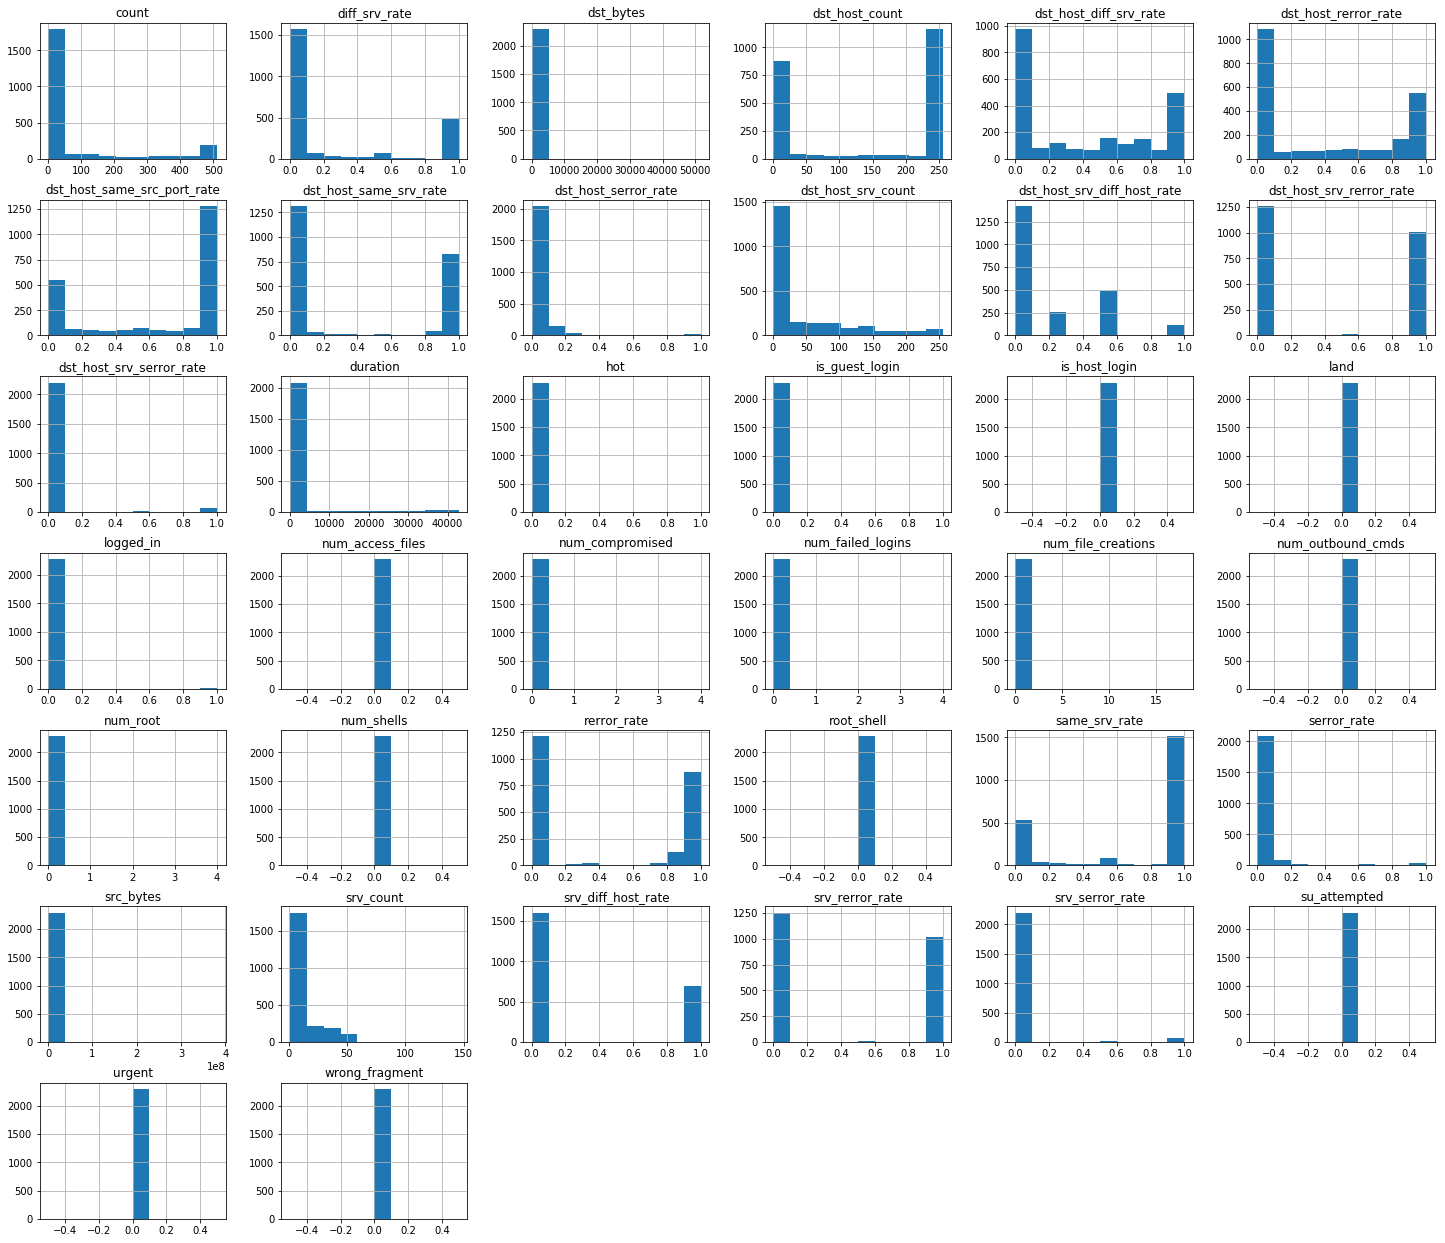

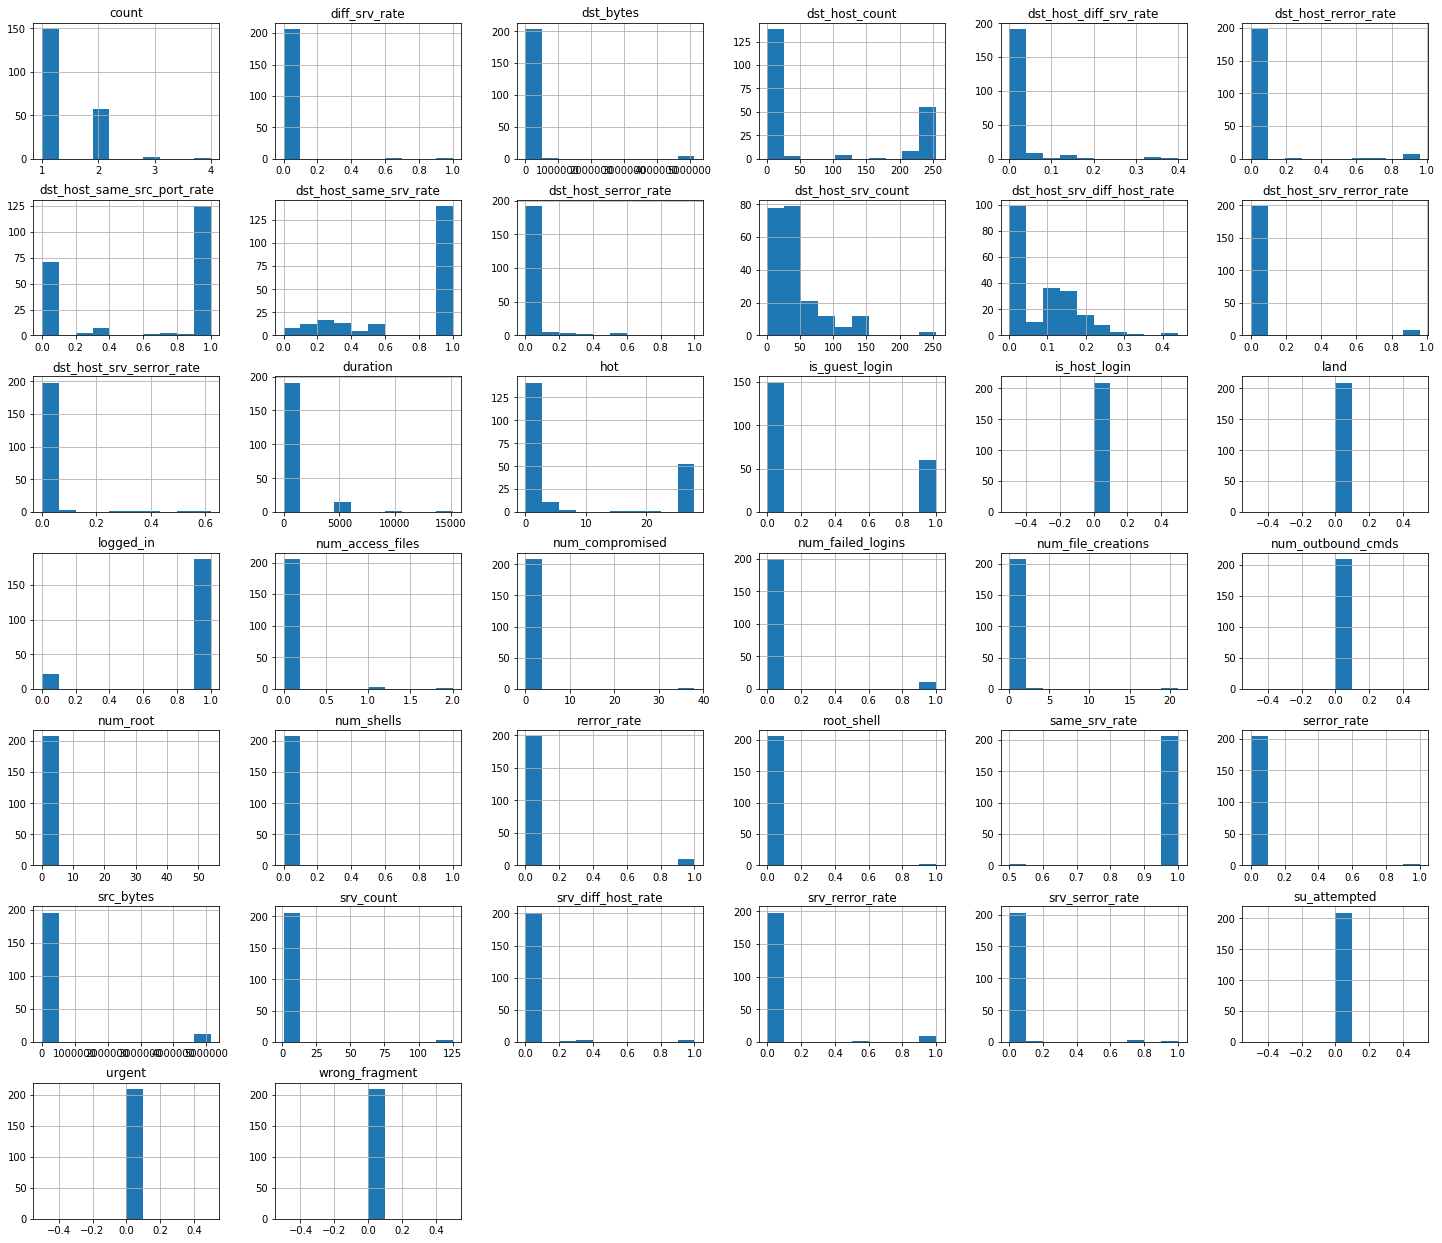

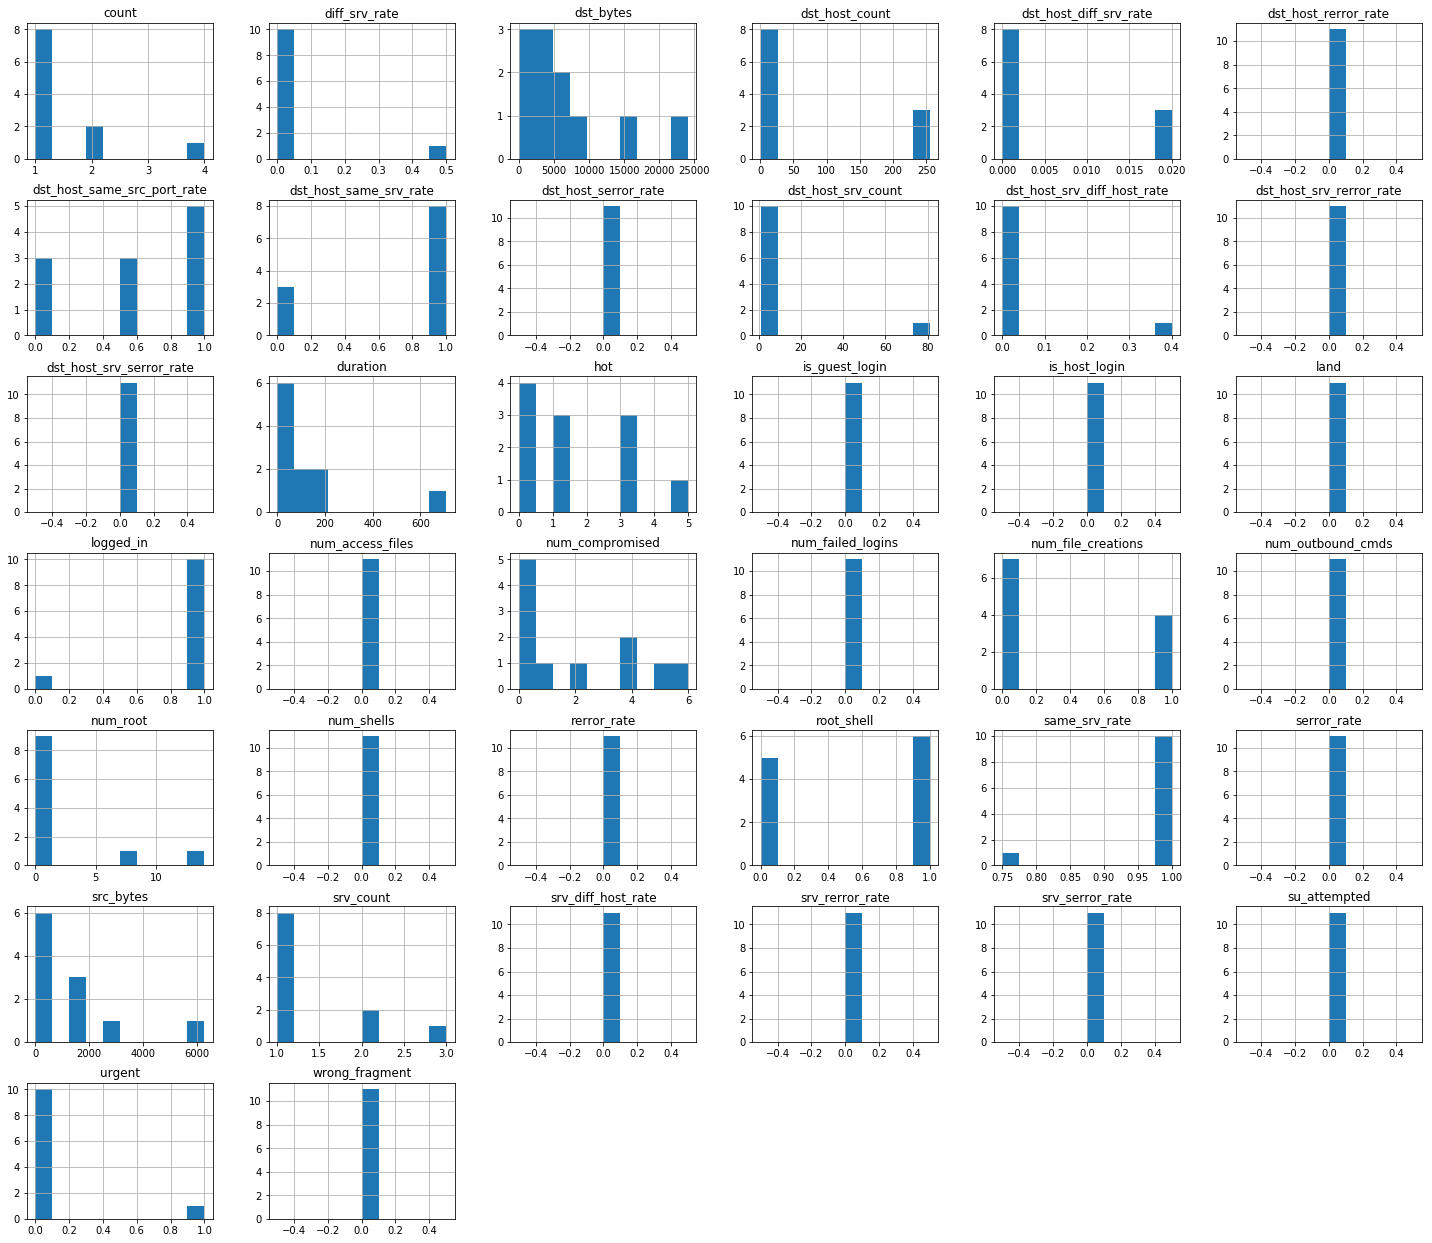

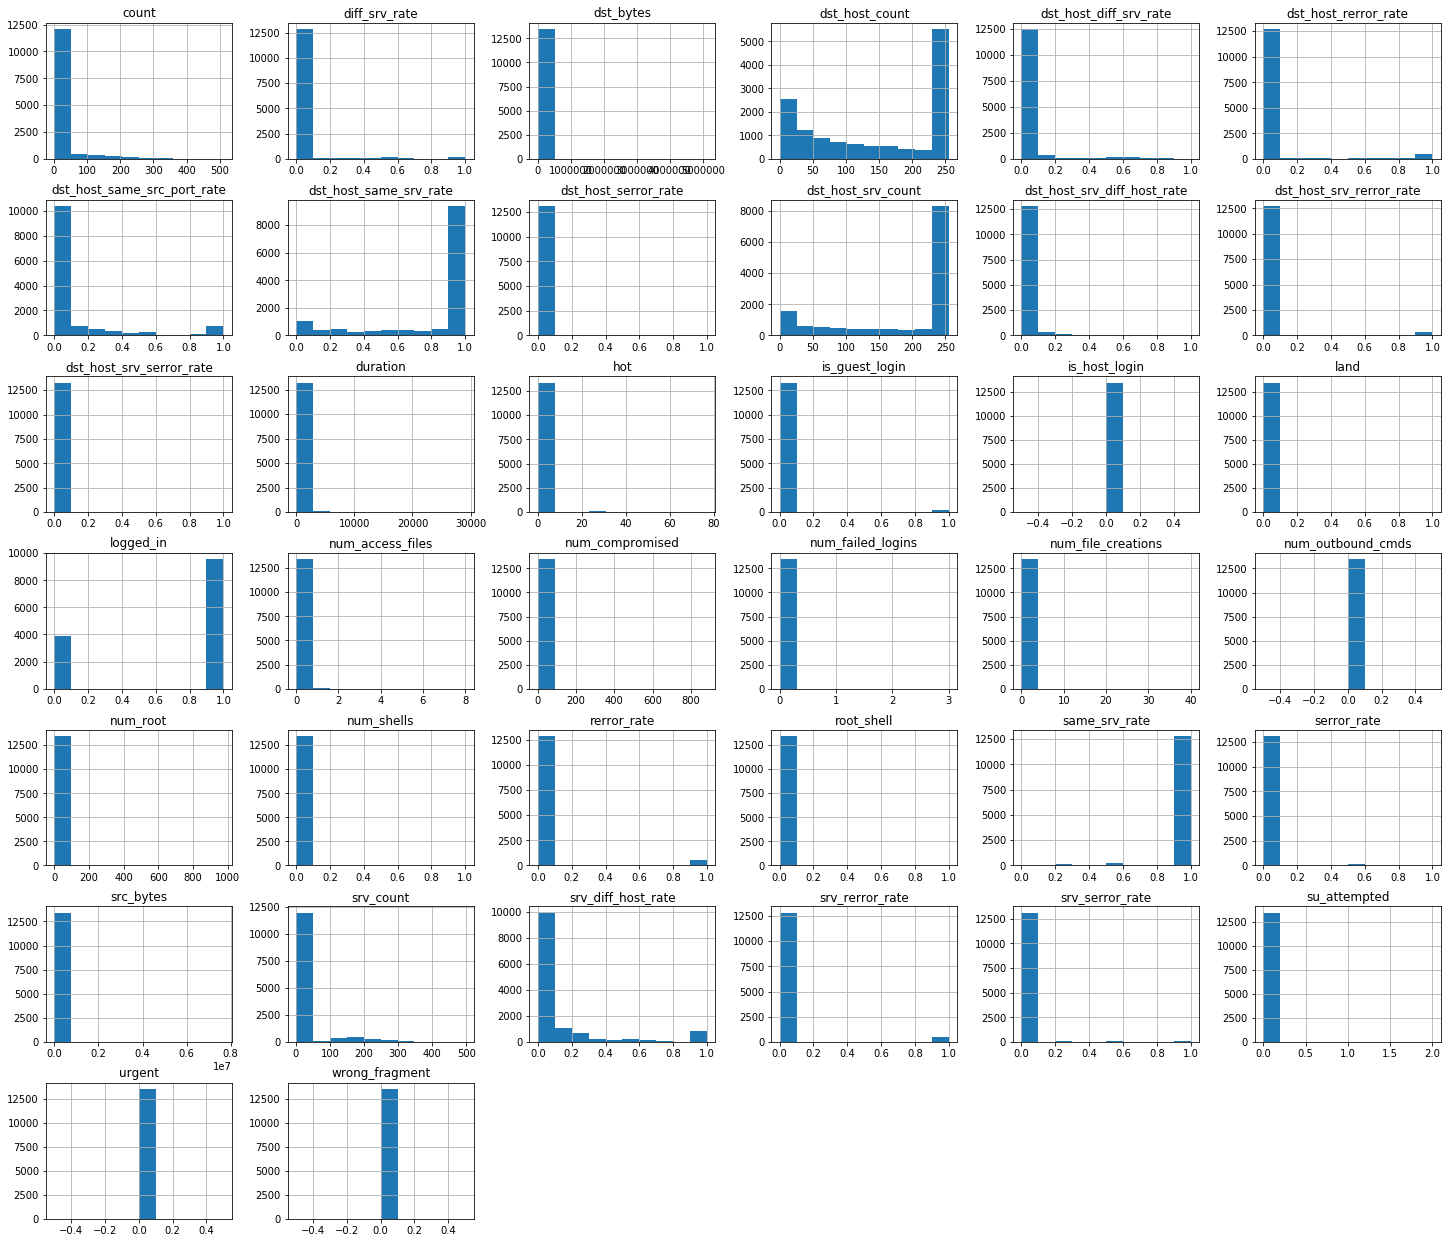

In [17]:
kdd_attack_type_group.hist(figsize=[25,22])

In [18]:
gb = dataset.kdd_diff_level_train.groupby(dataset.kdd_diff_level_train)
(gb.count() / dataset.kdd_diff_level_train.count())*100

difficulty_level
0      0.047634
1      0.067482
2      0.039695
3      0.055573
4      0.055573
5      0.055573
6      0.107177
        ...    
15     3.183550
16     1.861702
17     2.330105
18    16.441728
19     8.125595
20    15.330264
21    49.599079
Name: difficulty_level, Length: 22, dtype: float64

In [19]:
gb = dataset.kdd_diff_level_test.groupby(dataset.kdd_diff_level_test)
(gb.count() / dataset.kdd_diff_level_test.count())*100

difficulty_level
0      1.037975
1      0.734177
2      0.464135
3      0.978903
4      0.852321
5      0.869198
6      1.324895
        ...    
14     6.210970
15     9.924051
16     5.746835
17     9.856540
18    25.037975
19     7.510549
20    11.333333
Name: difficulty_level, Length: 21, dtype: float64

In [20]:
dummy_variables_2labels = [*category_variables, "is"]
dummy_variables_5labels = [*category_variables, "type"]
class preprocessing:
    kdd_train_2labels = pd.get_dummies(dataset.kdd_train, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_train_5labels = pd.get_dummies(dataset.kdd_train, columns = dummy_variables_5labels, prefix=dummy_variables_5labels)

    kdd_test_2labels = pd.get_dummies(dataset.kdd_test, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_test_5labels = pd.get_dummies(dataset.kdd_test, columns = dummy_variables_5labels, prefix=dummy_variables_5labels)


    kdd_train_2labels_y = dataset.kdd_train["is"].copy() # For SVM
    kdd_train_5labels_y = dataset.kdd_train["type"].copy() # For SVM

    kdd_test_2labels_y = dataset.kdd_test["is"].copy() # For SVM
    kdd_test_5labels_y = dataset.kdd_test["type"].copy() # For SVM

    kdd_train_2labels.drop(["label", "type"], axis=1, inplace=True)
    kdd_test_2labels.drop(["label", "type"], axis=1, inplace=True)

    kdd_train_5labels.drop(["label", "is"], axis=1, inplace=True)
    kdd_test_5labels.drop(["label", "is"], axis=1, inplace=True)

In [21]:
preprocessing.kdd_train_2labels.columns.to_series().to_csv("dataset/columns_2labels.csv")
preprocessing.kdd_train_5labels.columns.to_series().to_csv("dataset/columns_5labels.csv")

In [22]:
preprocessing.kdd_train_2labels.shape

(25192, 120)

In [23]:
preprocessing.kdd_train_5labels.shape

(25192, 123)

In [24]:
preprocessing.kdd_test_2labels.shape

(11850, 120)

In [25]:
preprocessing.kdd_test_5labels.shape

(11850, 123)

In [26]:
preprocessing.kdd_train_2labels_y.shape

(25192,)

In [27]:
preprocessing.kdd_test_2labels_y.shape

(11850,)

In [28]:
preprocessing.kdd_train_5labels_y.shape

(25192,)

In [29]:
preprocessing.kdd_test_5labels_y.shape

(11850,)

In [30]:
preprocessing.kdd_train_2labels.to_pickle("dataset/kdd_train_2labels_20percent.pkl")
preprocessing.kdd_train_2labels_y.to_pickle("dataset/kdd_train_2labels_y_20percent.pkl")

preprocessing.kdd_train_5labels.to_pickle("dataset/kdd_train_5labels_20percent.pkl")
preprocessing.kdd_train_5labels_y.to_pickle("dataset/kdd_train_5labels_y_20percent.pkl")

preprocessing.kdd_test_2labels.to_pickle("dataset/kdd_test_2labels_20percent.pkl")
preprocessing.kdd_test_2labels_y.to_pickle("dataset/kdd_test_2labels_y_20percent.pkl")

preprocessing.kdd_test_5labels.to_pickle("dataset/kdd_test_5labels_20percent.pkl")
preprocessing.kdd_test_5labels_y.to_pickle("dataset/kdd_test_5labels_y_20percent.pkl")


dataset.kdd_diff_level_train.to_pickle("dataset/kdd_diff_level_train_20percent.pkl")
dataset.kdd_diff_level_test.to_pickle("dataset/kdd_diff_level_test_20percent.pkl")